In [1]:
# clone in the sample datasets
!git clone https://github.com/mayank-jain632/Linear-Regression-From-Scratch.git

Cloning into 'Linear-Regression-From-Scratch'...
remote: Enumerating objects: 28, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 28 (delta 5), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (28/28), 38.31 KiB | 5.47 MiB/s, done.
Resolving deltas: 100% (5/5), done.


In [2]:
# make the neccesary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# import the csv through pandas
df = pd.read_csv("/content/Linear-Regression-From-Scratch/Linear-Regression.csv")
data = np.array(df)

# normalize the data

x1 = data[:, 0]
y1 = data[:, 1]

x = (x1 - np.min(x1)) / (np.max(x1) - np.min(x1))
y = (y1 - np.min(y1)) / (np.max(y1) - np.min(y1))

# instantiate the initial vals
learning_rate = .1

w = []
k = 0

x_list = []
deriv = []

In [4]:
# Important functions
def make_x_list(x, k):
    x_list.clear()  # Clear x_list before populating
    for i in range(k + 1):
        x_list.append(x ** i)

def der(wi, x, y, i):
    num = ((2 * ((wi * x) - y) * (x ** i)))
    return num

def update(xi, yi):
    new_weights = w.copy()  # Create a copy of the current weights
    for i in range(k + 1):
        gradient = np.sum(der(w[i], xi, yi, i))
        new_weights[i] = w[i] - (learning_rate) * gradient / len(x)
    w[:] = new_weights  # Update all the weights simultaneously

def init_w():
    for i in range(k + 1):
        #w.append((np.random.uniform(-1, 1)))
        w.append(0)


In [ ]:
# initiate the weights and the epochs
init_w()
epoch = 0;

# continue running for 1000 epochs (can be adjusted)
while epoch < 1000:

    loss = 0  # Reset loss for each epoch
    for i in range(len(x)):
        plugged_in = 0
        make_x_list(x[i], k)
        for j in range(k + 1):
            plugged_in += x_list[j] * w[j]
        #plugged_in -= y[i]
        loss += (plugged_in - y[i]) ** 2
        update(x[i], y[i])

      # Compute average loss per data point
    loss /= len(x)
    epoch+=1

    print("Epoch: ", epoch)
    print("Loss:", loss)
    print("Coefficients: ", w)

# print the final coefficients and final loss value
print("Final coefficients: ", w)
print("Loss:", loss)

# outputs removed to save space

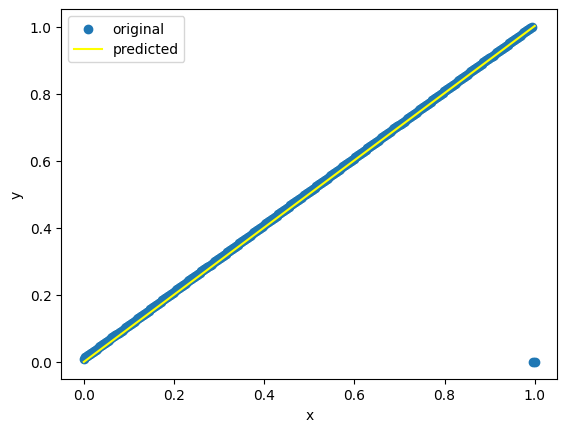

In [6]:
# Plot the dataset
plt.xlabel('x')
plt.ylabel('y')

plt.scatter(x, y, label = "original")

# plot the predicted line
plt.plot(x, w[0] * x, color = "yellow", label = "predicted")

plt.legend()
plt.show()